Reference: https://gitlab.com/wwc-workshops/case-studies/covid19-prediction/-/blob/master/COVID-19-Diagnosis.ipynb

## COVID-19 Diagnosis

Rapid Diagnosis From Common Laboratory Tests
<br><br>
Import some basic libraries.
* Pandas - provided data frames
* matplotlib.pyplot - plotting support
<br><br>
**Use Magic %matplotlib to display graphics inline instead of in a popup window**

In [84]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

## Loading and Reviewing the Data

In [85]:
patients_df = pd.read_csv('./datasets/covid19_diagnosis_dataset.csv', encoding = 'latin-1')

In [86]:
patients_df.shape

(5644, 111)

In [87]:
# display all columns
pd.set_option('display.max_columns', None)

# display first few records
patients_df.head(5)

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentrationÊ(MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Serum Glucose,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Mycoplasma pneumoniae,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,Neutrophils,Urea,Proteina C reativa mg/dL,Creatinine,Potassium,Sodium,"Influenza B, rapid test","Influenza A, rapid test",Alanine transaminase,Aspartate transaminase,Gamma-glutamyltransferaseÊ,Total Bilirubin,Direct Bilirubin,Indirect Bilirubin,Alkaline phosphatase,Ionized calciumÊ,Strepto A,Magnesium,pCO2 (venous blood gas analysis),Hb saturation (venous blood gas analysis),Base excess (venous blood gas analysis),pO2 (venous blood gas analysis),Fio2 (venous blood gas analysis),Total CO2 (venous blood gas analysis),pH (venous blood gas analysis),HCO3 (venous blood gas analysis),Rods #,Segmented,Promyelocytes,Metamyelocytes,Myelocytes,Myeloblasts,Urine - Esterase,Urine - Aspect,Urine - pH,Urine - Hemoglobin,Urine - Bile pigments,Urine - Ketone Bodies,Urine - Nitrite,Urine - Density,Urine - Urobilinogen,Urine - Protein,Urine - Sugar,Urine - Leukocytes,Urine - Crystals,Urine - Red blood cells,Urine - Hyaline cylinders,Urine - Granular cylinders,Urine - Yeasts,Urine - Color,Partial thromboplastin timeÊ(PTT)Ê,Relationship (Patient/Normal),International normalized ratio (INR),Lactic Dehydrogenase,"Prothrombin time (PT), Activity",Vitamin B12,Creatine phosphokinaseÊ(CPK)Ê,Ferritin,Arterial Lactic Acid,Lipase dosage,D-Dimer,Albumin,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.02234,-0.517413,0.010677,0.102004,0.318366,-0.95079,-0.09461,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,-0.140648,not_detected,not_detected,not_detected,not_detected,not_detected,detected,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,-0.619086,1.198059,-0.147895,2.089928,-0.305787,0.862512,negative,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [88]:
# display last few records
patients_df.tail(5)

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentrationÊ(MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Serum Glucose,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Mycoplasma pneumoniae,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,Neutrophils,Urea,Proteina C reativa mg/dL,Creatinine,Potassium,Sodium,"Influenza B, rapid test","Influenza A, rapid test",Alanine transaminase,Aspartate transaminase,Gamma-glutamyltransferaseÊ,Total Bilirubin,Direct Bilirubin,Indirect Bilirubin,Alkaline phosphatase,Ionized calciumÊ,Strepto A,Magnesium,pCO2 (venous blood gas analysis),Hb saturation (venous blood gas analysis),Base excess (venous blood gas analysis),pO2 (venous blood gas analysis),Fio2 (venous blood gas analysis),Total CO2 (venous blood gas analysis),pH (venous blood gas analysis),HCO3 (venous blood gas analysis),Rods #,Segmented,Promyelocytes,Metamyelocytes,Myelocytes,Myeloblasts,Urine - Esterase,Urine - Aspect,Urine - pH,Urine - Hemoglobin,Urine - Bile pigments,Urine - Ketone Bodies,Urine - Nitrite,Urine - Density,Urine - Urobilinogen,Urine - Protein,Urine - Sugar,Urine - Leukocytes,Urine - Crystals,Urine - Red blood cells,Urine - Hyaline cylinders,Urine - Granular cylinders,Urine - Yeasts,Urine - Color,Partial thromboplastin timeÊ(PTT)Ê,Relationship (Patient/Normal),International normalized ratio (INR),Lactic Dehydrogenase,"Prothrombin time (PT), Activity",Vitamin B12,Creatine phosphokinaseÊ(CPK)Ê,Ferritin,Arterial Lactic Acid,Lipase dosage,D-Dimer,Albumin,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
5639,ae66feb9e4dc3a0,3,positive,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5640,517c2834024f3ea,17,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5641,5c57d6037fe266d,4,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5642,c20c44766f28291,10,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [89]:
# clean up column names - remove spaces, etc.
patients_df.columns = patients_df.columns.str.strip()\
                    .str.lower()\
                    .str.replace(' ', '_')\
                    .str.replace('(', '')\
                    .str.replace(')', '')

In [90]:
# display last few records
patients_df.tail(5)

,patient_id,patient_age_quantile,sars-cov-2_exam_result,"patient_addmited_to_regular_ward_1=yes,_0=no","patient_addmited_to_semi-intensive_unit_1=yes,_0=no","patient_addmited_to_intensive_care_unit_1=yes,_0=no",hematocrit,hemoglobin,platelets,mean_platelet_volume,red_blood_cells,lymphocytes,mean_corpuscular_hemoglobin_concentrationêmchc,leukocytes,basophils,mean_corpuscular_hemoglobin_mch,eosinophils,mean_corpuscular_volume_mcv,monocytes,red_blood_cell_distribution_width_rdw,serum_glucose,respiratory_syncytial_virus,influenza_a,influenza_b,parainfluenza_1,coronavirusnl63,rhinovirus/enterovirus,mycoplasma_pneumoniae,coronavirus_hku1,parainfluenza_3,chlamydophila_pneumoniae,adenovirus,parainfluenza_4,coronavirus229e,coronavirusoc43,inf_a_h1n1_2009,bordetella_pertussis,metapneumovirus,parainfluenza_2,neutrophils,urea,proteina_c_reativa_mg/dl,creatinine,potassium,sodium,"influenza_b,_rapid_test","influenza_a,_rapid_test",alanine_transaminase,aspartate_transaminase,gamma-glutamyltransferaseê,total_bilirubin,direct_bilirubin,indirect_bilirubin,alkaline_phosphatase,ionized_calciumê,strepto_a,magnesium,pco2_venous_blood_gas_analysis,hb_saturation_venous_blood_gas_analysis,base_excess_venous_blood_gas_analysis,po2_venous_blood_gas_analysis,fio2_venous_blood_gas_analysis,total_co2_venous_blood_gas_analysis,ph_venous_blood_gas_analysis,hco3_venous_blood_gas_analysis,rods_#,segmented,promyelocytes,metamyelocytes,myelocytes,myeloblasts,urine_-_esterase,urine_-_aspect,urine_-_ph,urine_-_hemoglobin,urine_-_bile_pigments,urine_-_ketone_bodies,urine_-_nitrite,urine_-_density,urine_-_urobilinogen,urine_-_protein,urine_-_sugar,urine_-_leukocytes,urine_-_crystals,urine_-_red_blood_cells,urine_-_hyaline_cylinders,urine_-_granular_cylinders,urine_-_yeasts,urine_-_color,partial_thromboplastin_timeêpttê,relationship_patient/normal,international_normalized_ratio_inr,lactic_dehydrogenase,"prothrombin_time_pt,_activity",vitamin_b12,creatine_phosphokinaseêcpkê,ferritin,arterial_lactic_acid,lipase_dosage,d-dimer,albumin,hb_saturation_arterial_blood_gases,pco2_arterial_blood_gas_analysis,base_excess_arterial_blood_gas_analysis,ph_arterial_blood_gas_analysis,total_co2_arterial_blood_gas_analysis,hco3_arterial_blood_gas_analysis,po2_arterial_blood_gas_analysis,arteiral_fio2,phosphor,cto2_arterial_blood_gas_analysis
5639,ae66feb9e4dc3a0,3,positive,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5640,517c2834024f3ea,17,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5641,5c57d6037fe266d,4,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5642,c20c44766f28291,10,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

## Definition of features

The following features will be used to indicate kidney disease. Age will additionally be included given that patterns can be found there.

|Feature|Column Name|Description|
|-------|-----------|-----------|
|Creatinine|Creatine|Used to indicate Elevated Scr / BUN|
| Creatinine | Creatine phosphokinaseÊ(CPK)Ê | Used to indicate Elevated Scr / BUN|
| Age | patient_age_quantile | Age of patient |
| Urine...Protein| urine-urobilinogen | Used to indicate Proteinuria | 
| Proteina.C.reativa.mg.dL| urine-protein | Used to indicate Proteinuria | 
| Urine...Red.blood.cells| urine-red_blood_cells| Used to indicate Hematuria| 

**sars-cov-2_exam_result - feature that denotes COVID-19 diagnosis**

In [91]:
# remove the columns that will not be used
patients_df.drop(patients_df.columns.difference(['sars-cov-2_exam_result','patient_age_quantile','creatinine','creatine_phosphokinaseêcpkê', 'urine_-_protein', 'proteina_c_reativa_mg/dl' ,'urine_-_red_blood_cells']), 1, inplace=True)
# patients_df.drop(patients_df.columns.difference(['sars-cos-2_exam_result', 'patient_age_quantile', 'creatineine',
#                                                 'creatine_phosphokinaseêcpkê', 'urine_-_protein', 
#                                                 'proteina_c_reativa_mg/dl' ,'urine_-_red_blood_cells']), 1, inplace = True)

In [92]:
patients_df.head(5)

,patient_age_quantile,sars-cov-2_exam_result,proteina_c_reativa_mg/dl,creatinine,urine_-_protein,urine_-_red_blood_cells,creatine_phosphokinaseêcpkê
0,13,negative,NaN,NaN,NaN,NaN,NaN
1,17,negative,-0.147895,2.089928,NaN,NaN,NaN
2,8,negative,NaN,NaN,NaN,NaN,NaN
3,5,negative,NaN,NaN,NaN,NaN,NaN
4,15,negative,NaN,NaN,NaN,NaN,NaN


In [93]:
patients_df.tail(5)

,patient_age_quantile,sars-cov-2_exam_result,proteina_c_reativa_mg/dl,creatinine,urine_-_protein,urine_-_red_blood_cells,creatine_phosphokinaseêcpkê
5639,3,positive,NaN,NaN,NaN,NaN,NaN
5640,17,negative,NaN,NaN,NaN,NaN,NaN
5641,4,negative,NaN,NaN,NaN,NaN,NaN
5642,10,negative,NaN,NaN,absent,-0.177169,NaN
5643,19,positive,-0.50357,-0.735872,NaN,NaN,-0.343291


In [94]:
# check for null values
patients_df.isnull().sum()

patient_age_quantile              0
sars-cov-2_exam_result            0
proteina_c_reativa_mg/dl       5138
creatinine                     5220
urine_-_protein                5584
urine_-_red_blood_cells        5574
creatine_phosphokinaseêcpkê    5540
dtype: int64

In [95]:
# drop records without creatinine
patients_df.dropna(subset=['creatinine'], inplace=True)

In [96]:
patients_df.shape

(424, 7)

In [97]:
# replace NaN with 0
patients_df = patients_df.fillna(0)
patients_df.head()

,patient_age_quantile,sars-cov-2_exam_result,proteina_c_reativa_mg/dl,creatinine,urine_-_protein,urine_-_red_blood_cells,creatine_phosphokinaseêcpkê
1,17,negative,-0.147895,2.089928,0,0.0,0.000000
8,1,negative,-0.286986,-1.838623,0,0.0,-0.267856
15,9,negative,0.000000,-0.908177,0,0.0,-0.240915
22,9,negative,0.000000,-0.908177,0,0.0,0.000000
28,13,negative,-0.434025,-0.701411,0,0.0,0.000000


In [98]:
def plot_corr(df, size=11):
    """
    Function plot a graphical correlation matrix for each pair of columns in the dataframe.
    Shows the relationship between features.
    
    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot
    
    Displays:
        matrix of correlation between columns.
                                                0 ---------------> 1
                                                Expect a line running from top left to bottom right
    """
    corr = df.corr() # data frame correlation function
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr) # color code the rectangle by correlation value
    plt.xticks(range(len(corr.columns)), corr.columns) # draw x tick marks
    plt.yticks(range(len(corr.columns)), corr.columns) # draw y tick marks

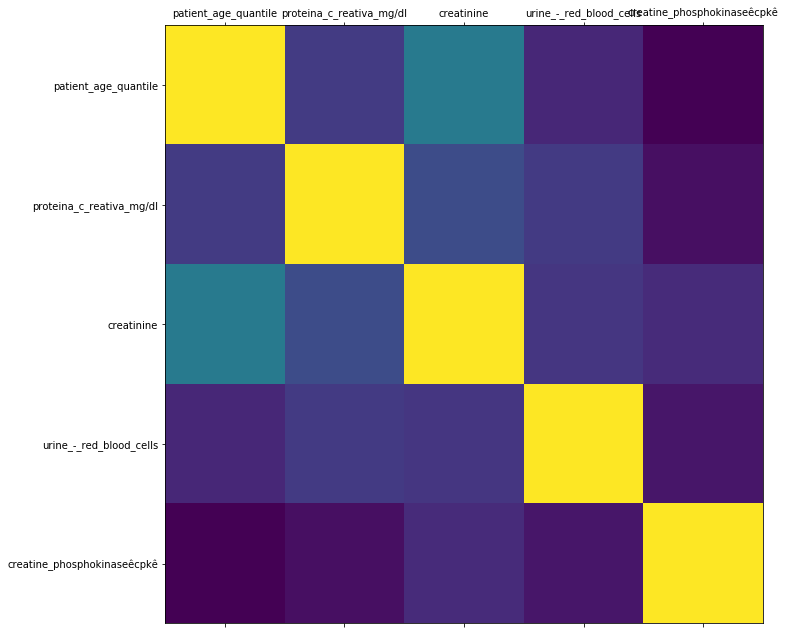

In [99]:
plot_corr(patients_df)

Doesn't look like any features are related 1 to 1; so the correlations look good. There appear to be no coorelated columns.For example, if yellow appears more than once in a row, consider those two features to be correlated (i.e. related) and one feature could be removed.

In [100]:
patients_df.corr()

,patient_age_quantile,proteina_c_reativa_mg/dl,creatinine,urine_-_red_blood_cells,creatine_phosphokinaseêcpkê
patient_age_quantile,1.000000,0.125404,0.372614,0.057246,-0.060179
proteina_c_reativa_mg/dl,0.125404,1.000000,0.184508,0.118496,-0.016450
creatinine,0.372614,0.184508,1.000000,0.107390,0.071785
urine_-_red_blood_cells,0.057246,0.118496,0.107390,1.000000,0.003520
creatine_phosphokinaseêcpkê,-0.060179,-0.016450,0.071785,0.003520,1.000000


## Data Types

Inspect data types to see if there are any issues. Data should be numeric.

In [101]:
patients_df.head()

,patient_age_quantile,sars-cov-2_exam_result,proteina_c_reativa_mg/dl,creatinine,urine_-_protein,urine_-_red_blood_cells,creatine_phosphokinaseêcpkê
1,17,negative,-0.147895,2.089928,0,0.0,0.000000
8,1,negative,-0.286986,-1.838623,0,0.0,-0.267856
15,9,negative,0.000000,-0.908177,0,0.0,-0.240915
22,9,negative,0.000000,-0.908177,0,0.0,0.000000
28,13,negative,-0.434025,-0.701411,0,0.0,0.000000


Change sars-cov-2_exam_result from boolean to integer, True=1, False=0

In [104]:
diagnosis_map = {'positive': 1, 'negative': 0}
patients_df['sars-cov-2_exam_result'] = patients_df['sars-cov-2_exam_result'].map(diagnosis_map)

verify data has changed

In [105]:
patients_df.head()

,patient_age_quantile,sars-cov-2_exam_result,proteina_c_reativa_mg/dl,creatinine,urine_-_protein,urine_-_red_blood_cells,creatine_phosphokinaseêcpkê,sarS-cov-2_exam_result
1,17,0,-0.147895,2.089928,0,0.0,0.000000,0
8,1,0,-0.286986,-1.838623,0,0.0,-0.267856,0
15,9,0,0.000000,-0.908177,0,0.0,-0.240915,0
22,9,0,0.000000,-0.908177,0,0.0,0.000000,0
28,13,0,-0.434025,-0.701411,0,0.0,0.000000,0


In [106]:
patients_df.isnull().values.any()

False

No obvious null values

Noticed the value 'absent' for urine-protein

In [107]:
patients_df.loc[patients_df['urine_-_protein'] == 'absent']

,patient_age_quantile,sars-cov-2_exam_result,proteina_c_reativa_mg/dl,creatinine,urine_-_protein,urine_-_red_blood_cells,creatine_phosphokinaseêcpkê,sarS-cov-2_exam_result
294,3,0,-0.207505,-0.666950,absent,-0.193921,-0.009222,0
330,7,0,-0.535362,0.263496,absent,-0.200203,0.033884,0
334,7,0,0.000000,0.366879,absent,-0.198109,0.000000,0
454,12,0,-0.163791,0.194574,absent,-0.200203,0.000000,0
640,11,0,-0.461843,-0.253418,absent,1.538882,0.000000,0
732,6,0,-0.167765,-0.356801,absent,-0.202297,0.000000,0
1142,8,0,1.068156,0.401340,absent,-0.154135,0.000000,0
1338,4,0,-0.535362,-1.114943,absent,-0.202297,-0.445667,0
1383,1,0,0.000000,-1.390630,absent,-0.202297,0.000000,0
1531,17,0,-0.380375,0.366879,absent,-0.085032,0.000000,0


In [109]:
# replace 'absent' with 0
absent_map = {'absent': 0}
patients_df['urine_-_protein'] = patients_df['urine_-_protein'].map(absent_map)

In [112]:
# check to see if replaced correctly
patients_df.loc[patients_df['urine_-_protein'] == 'absent']

C:\Users\Norto\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


,patient_age_quantile,sars-cov-2_exam_result,proteina_c_reativa_mg/dl,creatinine,urine_-_protein,urine_-_red_blood_cells,creatine_phosphokinaseêcpkê,sarS-cov-2_exam_result


In [113]:
# double check a previous row to ensure urine-protein is 0
patients_df.loc[294]

patient_age_quantile           3.000000
sars-cov-2_exam_result         0.000000
proteina_c_reativa_mg/dl      -0.207505
creatinine                    -0.666950
urine_-_protein                0.000000
urine_-_red_blood_cells       -0.193921
creatine_phosphokinaseêcpkê   -0.009222
sarS-cov-2_exam_result         0.000000
Name: 294, dtype: float64

## Check class distribution

Rare events are hard to predict.

In [115]:
num_obs = len(patients_df)
num_true = len(patients_df.loc[patients_df['sars-cov-2_exam_result'] == 1])
num_false = len(patients_df.loc[patients_df['sars-cov-2_exam_result'] == 0])
print("Number of True cases: {0} ({1:2.2f}%)".format(num_true, (num_true/num_obs)*100))
print("Number of False cases: {0} ({1:2.2f}%)".format(num_false, (num_false/num_obs)*100))

Number of True cases: 62 (14.62%)
Number of False cases: 362 (85.38%)


 Okay distribution of true and false cases. Ideally, need additional True cases. Can do some work to even out the dataset.

## Splitting the data